<a href="https://colab.research.google.com/github/lorifin/PAL/blob/main/Pipeline_model_complet_cat_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Searching for 'cat photo'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'dog photo'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Images corrompues supprimées : 7


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 89.0MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.825323,1.201063,0.777778,00:11


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.436358,0.549720,0.777778,00:14
1,0.385251,0.255476,0.888889,00:14
2,0.288903,0.225902,0.888889,00:14


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Prediction: cat


<Axes: title={'center': 'Predicted: cat'}>

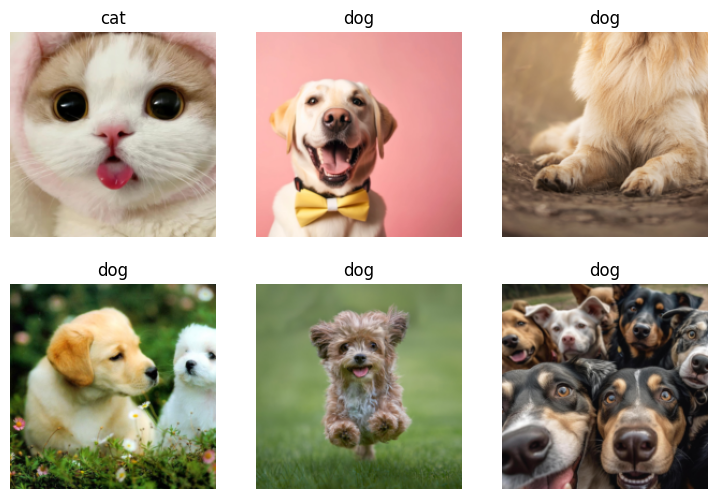

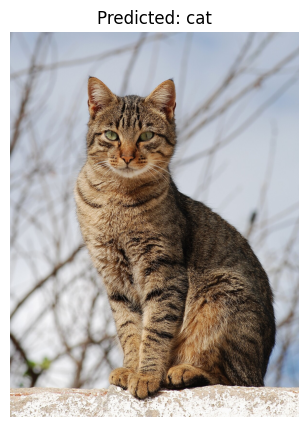

In [5]:
# ✅ 1️⃣ Installer les bibliothèques nécessaires
!pip install -U fastai fastdownload duckduckgo-search

# ✅ 2️⃣ Importer les bibliothèques
from fastai.vision.all import *
from fastdownload import download_url
from duckduckgo_search import DDGS
import time

# ✅ 3️⃣ Définir le nom du projet
project_name = 'cats_or_dogs'  # 👈 Change selon ton projet
path = Path(project_name)
path.mkdir(exist_ok=True)

# ✅ 4️⃣ Fonction de recherche d'images avec DDGS
def search_images(term, max_images=20):
    print(f"Searching for '{term}'")
    urls = []
    with DDGS() as ddgs:
        results = ddgs.images(term, max_results=max_images)
        for r in results:
            urls.append(r["image"])
    return urls

# ✅ 5️⃣ Télécharger et préparer les images
searches = 'cat','dog'  # 👈 Modifie selon ton projet
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    urls = search_images(f'{o} photo', max_images=30)
    download_images(dest, urls=urls)
    time.sleep(5)
    resize_images(dest, max_size=400)

# ✅ 6️⃣ Supprimer les images corrompues
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Images corrompues supprimées : {len(failed)}")

# ✅ 7️⃣ Créer les DataLoaders FastAI
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(192)
).dataloaders(path, bs=16)

# ✅ 8️⃣ Visualiser un batch pour vérifier
dls.show_batch(max_n=6)

# ✅ 9️⃣ Créer et entraîner le modèle avec resnet18
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

# ✅ 10️⃣ Tester le modèle sur une image du dataset
img = PILImage.create(get_image_files(path/'cat')[0])  # 👈 Modifier selon la classe à tester
pred_class, pred_idx, outputs = learn.predict(img)
print(f"Prediction: {pred_class}")
img.show(title=f"Predicted: {pred_class}")

# ✅ Fin : tu as maintenant un modèle IA complet prêt à utiliser pour la classification d’images
# et à présenter en démonstration TPE/PME ou dans tes formations IA.
